In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Using TensorFlow backend.


In [3]:
train = pd.read_csv('twt_#ifc.csv')
test = pd.read_csv('nit1.csv')

print(train.shape)
print(test.shape)

(1749, 8)
(517, 8)


In [4]:
train.head()


,full_text,retweet_count,user_followers_count,favorite_count,created_at,pos_score,neg_score,sent_score
0,whi wait get fine govern take care wear mask m...,6,2315,0,Mon Jun 01 12:56:02 +0000 2020,0.125,0.375,-1
1,start monday delhi govern gave relax lockdown ...,1,121,0,Mon Jun 01 12:30:05 +0000 2020,0.125,0.500,-1
2,not meme just inform lockdown look like,0,2,1,Mon Jun 01 12:14:42 +0000 2020,0.000,0.625,-1
3,with lockdown focu reviv economi howev team vi...,9,42,0,Mon Jun 01 12:06:29 +0000 2020,0.375,0.500,-1
4,hello guy video get look sonam kapoor celebr i...,0,3,0,Mon Jun 01 11:54:15 +0000 2020,0.000,0.625,-1


In [5]:
test.head()

,full_text,retweet_count,user_followers_count,favorite_count,created_at,pos_score,neg_score,sent_score
0,thi inspir enabl larg number indian donat PM c...,4683,143,0,Fri May 29 18:53:15 +0000 2020,1.375,0.500,1
1,He total lost mind the funniest part still thi...,0,27,0,Fri May 29 18:53:15 +0000 2020,0.625,0.125,1
2,download app today stay updat anyon around cov...,49,4,0,Fri May 29 18:52:49 +0000 2020,0.625,0.125,1
3,I want thank you hon ble MP shri Ji give chanc...,0,1397,0,Fri May 29 18:52:35 +0000 2020,2.000,0.125,1
4,startup build cultur leadership bring account ...,99,171,0,Fri May 29 18:52:07 +0000 2020,0.000,0.000,0


In [6]:
train['category'] = 1
test['category'] = 0

In [7]:
train.head()


,full_text,retweet_count,user_followers_count,favorite_count,created_at,pos_score,neg_score,sent_score,category
0,whi wait get fine govern take care wear mask m...,6,2315,0,Mon Jun 01 12:56:02 +0000 2020,0.125,0.375,-1,1
1,start monday delhi govern gave relax lockdown ...,1,121,0,Mon Jun 01 12:30:05 +0000 2020,0.125,0.500,-1,1
2,not meme just inform lockdown look like,0,2,1,Mon Jun 01 12:14:42 +0000 2020,0.000,0.625,-1,1
3,with lockdown focu reviv economi howev team vi...,9,42,0,Mon Jun 01 12:06:29 +0000 2020,0.375,0.500,-1,1
4,hello guy video get look sonam kapoor celebr i...,0,3,0,Mon Jun 01 11:54:15 +0000 2020,0.000,0.625,-1,1


In [8]:
df = pd.concat([train,test]) 

In [9]:
df.isna().sum()


full_text               0
retweet_count           0
user_followers_count    0
favorite_count          0
created_at              0
pos_score               0
neg_score               0
sent_score              0
category                0
dtype: int64

In [10]:
df.full_text.count()

2266

In [11]:
df.sent_score.value_counts()

 1    1233
-1     727
 0     306
Name: sent_score, dtype: int64

In [12]:

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [13]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [14]:
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text) 

In [15]:
df.text = df.full_text.apply(stem_text)

C:\Users\TEMP.DESKTOP-8R6RI8B.000\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


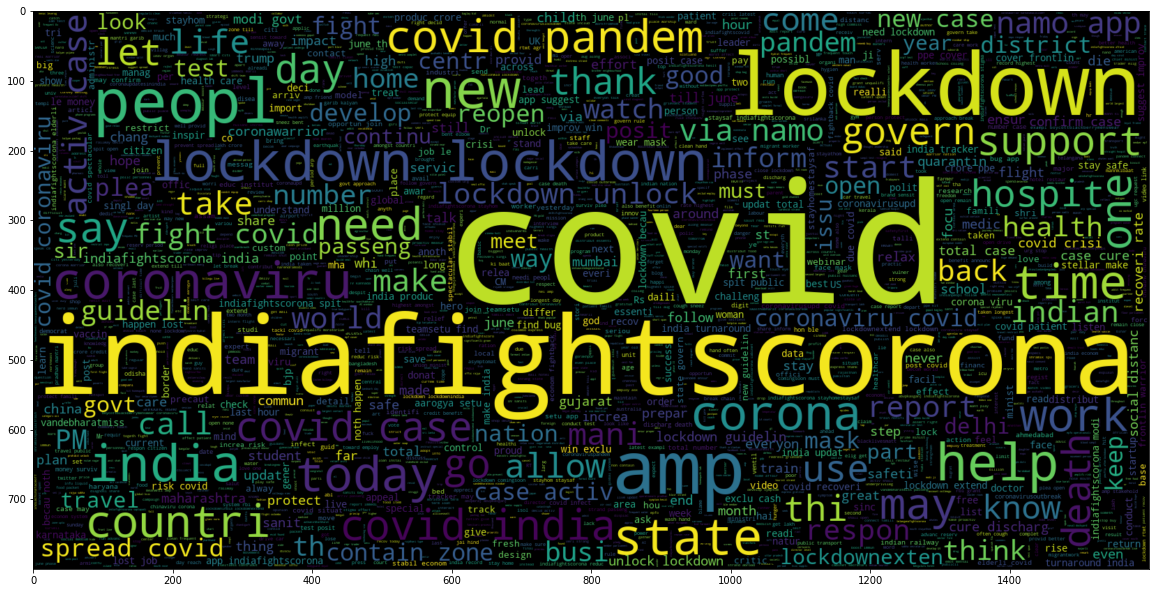

In [17]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

In [21]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category)


In [31]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (1699, 27182)
BOW_cv_test: (567, 27182)


In [33]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [34]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [35]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5
1699/1699 [==============================] - 4s 2ms/step - loss: 0.6357 - accuracy: 0.7457
Epoch 2/5
1699/1699 [==============================] - 4s 2ms/step - loss: 0.3493 - accuracy: 0.7987
Epoch 3/5
1699/1699 [==============================] - 4s 2ms/step - loss: 0.1553 - accuracy: 0.9482
Epoch 4/5
1699/1699 [==============================] - 3s 2ms/step - loss: 0.1154 - accuracy: 0.9541
Epoch 5/5
1699/1699 [==============================] - 3s 2ms/step - loss: 0.1174 - accuracy: 0.9541


In [87]:
pred = model.predict(cv_test_reviews)

In [76]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    elif(pred[i] < 0.5):
        pred[i] = -1
    else:
        pred[i] = 0

        

In [77]:
accuracy_score(pred,y_test)

0.7336860670194003

In [78]:
cv_report = classification_report(y_test,pred,target_names = ['-1','1','0'])
print(cv_report)

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.00      0.00      0.00       128
           0       0.82      0.95      0.88       439

    accuracy                           0.73       567
   macro avg       0.27      0.32      0.29       567
weighted avg       0.64      0.73      0.68       567



In [79]:
cm_cv = confusion_matrix(y_test,pred)
cm_cv

array([[  0,   0,   0],
       [ 39,   0,  89],
       [ 23,   0, 416]], dtype=int64)

In [81]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1,2], columns=[0,1,2])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

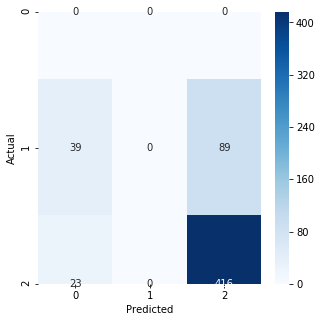

In [82]:
plt.figure(figsize = (5,5))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')